# Visualization

This notebook contains some visualizations from the training runs on December 1 and 2. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def plot_acc_loss(acc, loss, title=None, n_batches=None, conv=None):
    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(10, 4.8), dpi=300)
    if title:
        fig.suptitle(title)
    if conv:
        acc = np.convolve(acc, np.ones(conv) / conv, mode='valid')
        loss = np.convolve(loss, np.ones(conv) / conv, mode='valid')
    axs[0].plot(acc)
    axs[0].set_ylabel('accuracy')
    axs[0].set_ylim(acc.min()*0.9, 1.)
    axs[1].plot(loss)
    axs[1].set_ylabel('loss')
    axs[1].set_ylim(loss.min()*0.9, loss.max()*1.1)
    axs[1].set_xlabel(f'batch ({n_batches} per epoch)')
    axs[1].set_yscale('log')
    axs[0].grid()
    axs[1].grid()
    if n_batches:
        axs[0].vlines(list(range(0, loss.shape[0], n_batches)), acc.min()*0.9, 1., ls='dashed', colors='green', lw=1)
        axs[1].vlines(list(range(0, loss.shape[0], n_batches)), loss.min()*0.9, loss.max()*1.1, ls='dashed', colors='green', lw=1)
    plt.tight_layout()
    plt.show()

In [30]:
def compute_mean_acc_loss(acc, loss, n_epochs, std=False):
    n_batches = acc.shape[0] // n_epochs
    u_acc, u_loss = [], []
    std_acc, std_loss = [], []
    for i in range(n_epochs):
        a, b = i*n_batches, (i+1)*n_batches
        u_acc.append(acc[a:b].mean())
        u_loss.append(loss[a:b].mean())
        std_acc.append(acc[a:b].std())
        std_loss.append(loss[a:b].std())
    if std:
        return np.array(u_acc), np.array(u_loss), np.array(std_acc), np.array(std_loss)
    else:
        return np.array(u_acc), np.array(u_loss)

In [4]:
def print_mean_acc_loss(acc, loss, n_batches):
    for i in range(acc.shape[0] // n_batches):
        a, b = i*n_batches, (i+1)*n_batches
        print(f'epoch {i+1}: acc {acc[a:b].mean():.2%} loss {loss[a:b].mean():.1f}')

Training duration: 90h of GPU time (~15sec per batch for 540 batches, 10 epochs, 4 folds)

List models

In [5]:
os.listdir('../models')

['dec3tridx234',
 'dec3tridx124',
 'dec2tridx123bs64',
 'dec3tridx123',
 'dec3tridx134',
 'dec14noinit_tridx134',
 'dec14tridx134']

Different folds: (**TODO: re-run when 123 is done**)

In [71]:
good = ['234', '134', '124']
notgood = ['123']

In [102]:
BP = '../models/dec3tridx123'
sorted([(e, np.load(f'{BP}/{e}').shape) for e in os.listdir(BP) if 'test_loss' in e])

[('e10_b531_test_loss.npy', (95,)),
 ('e1_b531_test_loss.npy', (57,)),
 ('e2_b531_test_loss.npy', (93,)),
 ('e3_b531_test_loss.npy', (71,)),
 ('e4_b531_test_loss.npy', (53,)),
 ('e5_b531_test_loss.npy', (72,)),
 ('e6_b531_test_loss.npy', (70,)),
 ('e7_b531_test_loss.npy', (58,)),
 ('e8_b531_test_loss.npy', (52,)),
 ('e9_b531_test_loss.npy', (61,))]

In [85]:
sorted(list(filter(lambda x: 'test_loss' in x, os.listdir('../models/dec3tridx123'))))

['e10_b531_test_loss.npy',
 'e1_b531_test_loss.npy',
 'e2_b531_test_loss.npy',
 'e3_b531_test_loss.npy',
 'e4_b531_test_loss.npy',
 'e5_b531_test_loss.npy',
 'e6_b531_test_loss.npy',
 'e7_b531_test_loss.npy',
 'e8_b531_test_loss.npy',
 'e9_b531_test_loss.npy']

123


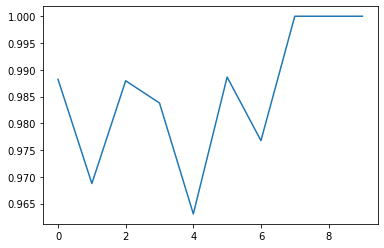

In [84]:
print('123')
x = [np.load(f'../models/dec3tridx123/e{i}_b531_test_acc.npy').mean() for i in range(1,11)]
plt.plot(x);

dec3tridx123: max accuracy 98.45%, min loss 31822.6
dec3tridx123: max test accuracy 99.07%, min test loss 33758.8
dec3tridx124: max accuracy 97.90%, min loss 36231.8
dec3tridx124: max test accuracy 99.87%, min test loss 17640.9
dec3tridx134: max accuracy 96.56%, min loss 27526.1
dec3tridx134: max test accuracy 76.40%, min test loss 54720.5
dec3tridx234: max accuracy 98.03%, min loss 29331.9
dec3tridx234: max test accuracy 98.65%, min test loss 41002.7


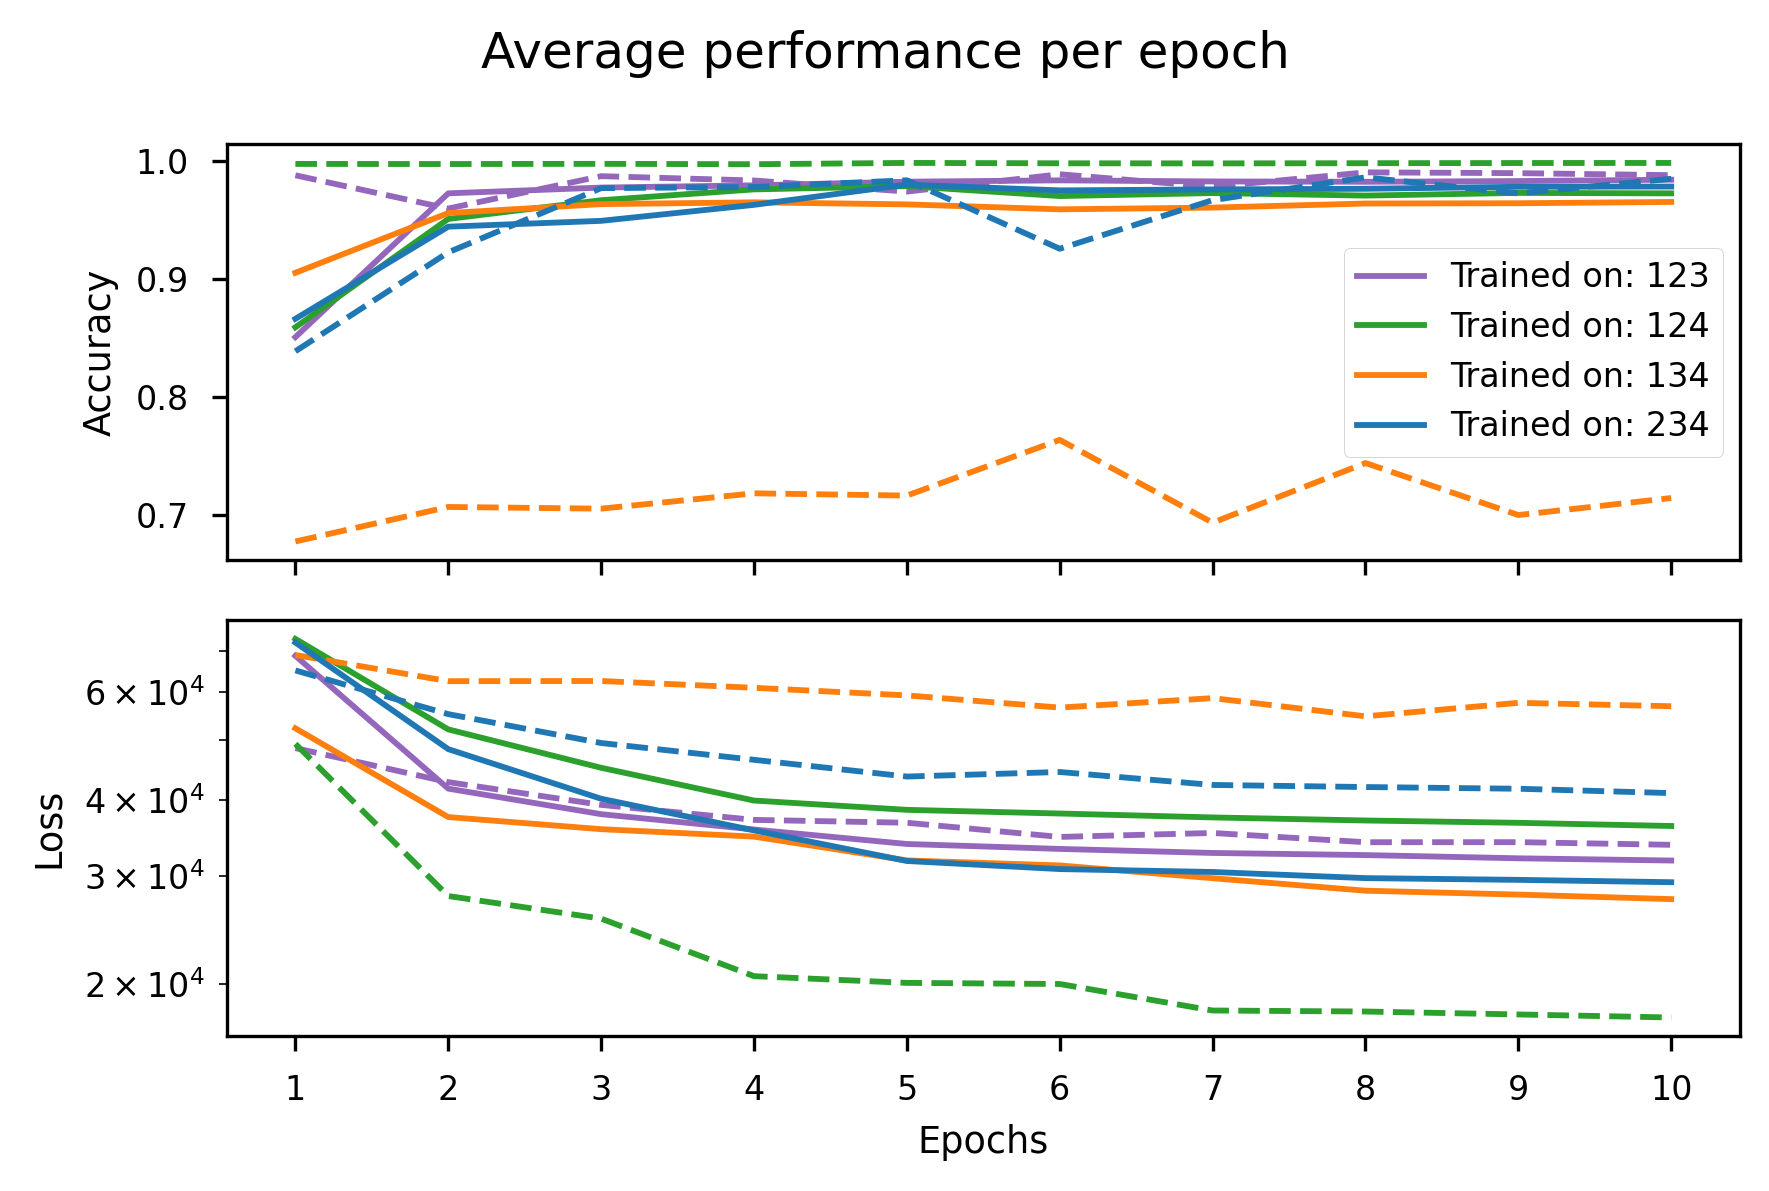

In [40]:
SHOW_STD = False
with plt.style.context('seaborn-paper'):
    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8,5), dpi=300)
    fig.suptitle('Average performance per epoch')
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple'][::-1]
    # ['gray', 'orange', 'red', 'green', 'purple']
    for fidx, folder in enumerate(sorted([e for e in os.listdir('../models') if 'dec3' in e])):
        if 'dec3' not in folder:
            continue
        path = f'../models/{folder}'
        acc = np.load(f'{path}/acc.npy')
        loss = np.load(f'{path}/loss.npy')

        test_acc_files = list(filter(lambda x: 'test_acc' in x, os.listdir(f'../models/{folder}')))
        if len(test_acc_files) == 10:
            test_acc = np.array([np.load(f'../models/{folder}/{[e for e in test_acc_files if f"e{i}_" in e][0]}').mean() for i in range(1,11)])
            test_acc_std = np.array([np.load(f'../models/{folder}/{[e for e in test_acc_files if f"e{i}_" in e][0]}').std() for i in range(1,11)])
            axs[0].plot(range(1,11), test_acc, ls='--', c=colors[fidx])
            if SHOW_STD:
                axs[0].fill_between(range(1,11), test_acc + test_acc_std, test_acc - test_acc_std, facecolor=colors[fidx], alpha=0.1, interpolate=True)
        else:
            print('not', folder)

        test_loss_files = list(filter(lambda x: 'test_loss' in x, os.listdir(f'../models/{folder}')))
        if len(test_loss_files) == 10:
            test_loss = np.array([np.load(f'../models/{folder}/{[e for e in test_loss_files if f"e{i}_" in e][0]}').mean() for i in range(1,11)])
            test_loss_std = np.array([np.load(f'../models/{folder}/{[e for e in test_loss_files if f"e{i}_" in e][0]}').std() for i in range(1,11)])
            axs[1].plot(range(1,11), test_loss, ls='--', c=colors[fidx])
            if SHOW_STD:
                axs[1].fill_between(range(1,11), test_loss + test_loss_std, test_loss - test_loss_std, facecolor=colors[fidx], alpha=0.1, interpolate=True)
        else:
            print('not', folder)

        u_acc, u_loss, std_acc, std_loss = compute_mean_acc_loss(acc, loss, 10, std=True)
        print(f"{folder}: max accuracy {u_acc.max():.2%}, min loss {u_loss.min():.1f}")
        print(f"{folder}: max test accuracy {max(test_acc):.2%}, min test loss {min(test_loss):.1f}")
        axs[0].plot(range(1,11), u_acc, label=f"Trained on: {folder.split('tridx')[1]}", c=colors[fidx])
        if SHOW_STD:
            axs[0].fill_between(range(1,11), u_acc + std_acc, u_acc - std_acc, facecolor=colors[fidx], alpha=0.1, interpolate=True)
    #     axs[0].set_ylim(0.7, 1.0)
        axs[0].set_ylabel('Accuracy')
        axs[1].plot(range(1,11), u_loss, c=colors[fidx])
        if SHOW_STD:
            axs[1].fill_between(range(1,11), u_loss + std_loss, u_loss - std_loss, facecolor=colors[fidx], alpha=0.1, interpolate=True)
        axs[1].set_xticks(range(1,11))
        axs[1].set_yscale('log')
        axs[1].set_ylabel('Loss')
        axs[1].set_xlabel('Epochs')
    fig.tight_layout()
    axs[0].legend();
plt.savefig('plot.png', dpi=300)

In [7]:
checkpoints_for_folder = {}
for folder in [e for e in os.listdir('../models') if 'dec3' in e]:
    checkpoints = [e for e in os.listdir(f'../models/{folder}') if '.pt' in e]
    last_full_batch = max([int(e.split('_b')[1][:-3]) for e in checkpoints]) - 1
    checkpoints_for_folder[folder] = [f'SD_e{epoch}_b{last_full_batch}.pt' for epoch in range(1,11)]
checkpoints_for_folder

{'dec3tridx234': ['SD_e1_b543.pt',
  'SD_e2_b543.pt',
  'SD_e3_b543.pt',
  'SD_e4_b543.pt',
  'SD_e5_b543.pt',
  'SD_e6_b543.pt',
  'SD_e7_b543.pt',
  'SD_e8_b543.pt',
  'SD_e9_b543.pt',
  'SD_e10_b543.pt'],
 'dec3tridx124': ['SD_e1_b537.pt',
  'SD_e2_b537.pt',
  'SD_e3_b537.pt',
  'SD_e4_b537.pt',
  'SD_e5_b537.pt',
  'SD_e6_b537.pt',
  'SD_e7_b537.pt',
  'SD_e8_b537.pt',
  'SD_e9_b537.pt',
  'SD_e10_b537.pt'],
 'dec3tridx123': ['SD_e1_b531.pt',
  'SD_e2_b531.pt',
  'SD_e3_b531.pt',
  'SD_e4_b531.pt',
  'SD_e5_b531.pt',
  'SD_e6_b531.pt',
  'SD_e7_b531.pt',
  'SD_e8_b531.pt',
  'SD_e9_b531.pt',
  'SD_e10_b531.pt'],
 'dec3tridx134': ['SD_e1_b541.pt',
  'SD_e2_b541.pt',
  'SD_e3_b541.pt',
  'SD_e4_b541.pt',
  'SD_e5_b541.pt',
  'SD_e6_b541.pt',
  'SD_e7_b541.pt',
  'SD_e8_b541.pt',
  'SD_e9_b541.pt',
  'SD_e10_b541.pt']}

In [18]:
12 / (sum(list(map(len, checkpoints_for_folder.values())))/60)

18.0

In [8]:
for folder, checkpoints in checkpoints_for_folder.items():
    for checkpoint in checkpoints:
        chck_idx = [i for i in range(1, 5) if str(i) not in folder[7:]][0]
        print(f'python test_snn.py models/{folder}/{checkpoint} {chck_idx} -g')

python test_snn.py models/dec3tridx234/SD_e1_b543.pt 1 -g
python test_snn.py models/dec3tridx234/SD_e2_b543.pt 1 -g
python test_snn.py models/dec3tridx234/SD_e3_b543.pt 1 -g
python test_snn.py models/dec3tridx234/SD_e4_b543.pt 1 -g
python test_snn.py models/dec3tridx234/SD_e5_b543.pt 1 -g
python test_snn.py models/dec3tridx234/SD_e6_b543.pt 1 -g
python test_snn.py models/dec3tridx234/SD_e7_b543.pt 1 -g
python test_snn.py models/dec3tridx234/SD_e8_b543.pt 1 -g
python test_snn.py models/dec3tridx234/SD_e9_b543.pt 1 -g
python test_snn.py models/dec3tridx234/SD_e10_b543.pt 1 -g
python test_snn.py models/dec3tridx124/SD_e1_b537.pt 3 -g
python test_snn.py models/dec3tridx124/SD_e2_b537.pt 3 -g
python test_snn.py models/dec3tridx124/SD_e3_b537.pt 3 -g
python test_snn.py models/dec3tridx124/SD_e4_b537.pt 3 -g
python test_snn.py models/dec3tridx124/SD_e5_b537.pt 3 -g
python test_snn.py models/dec3tridx124/SD_e6_b537.pt 3 -g
python test_snn.py models/dec3tridx124/SD_e7_b537.pt 3 -g
python test_s

In [23]:
np.load('../models/dec3tridx234/e1_b543_test_acc.npy').mean(), np.load('../models/dec3tridx234/e1_b543_test_acc.npy').std()

(0.839600988700565, 0.046956141136241726)

(0.7, 1.0)

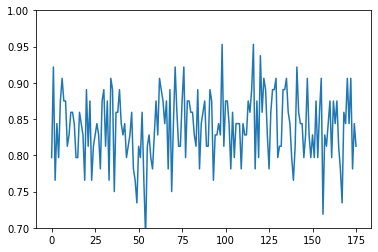

In [22]:
plt.plot(np.load('../models/dec3tridx234/e1_b543_test_acc.npy'))
plt.ylim(0.7,1.0)

# Old code

training:
epoch 1: acc 51.10% loss 118639.5
epoch 2: acc 60.19% loss 87279.0
epoch 3: acc 69.27% loss 82612.6
epoch 4: acc 78.82% loss 78873.4
epoch 5: acc 84.69% loss 75079.3
epoch 6: acc 88.15% loss 71120.7
epoch 7: acc 91.46% loss 69556.1

testing (last model):
acc 89.36% +/- 0.99% loss 59968.5 +/- 807.1


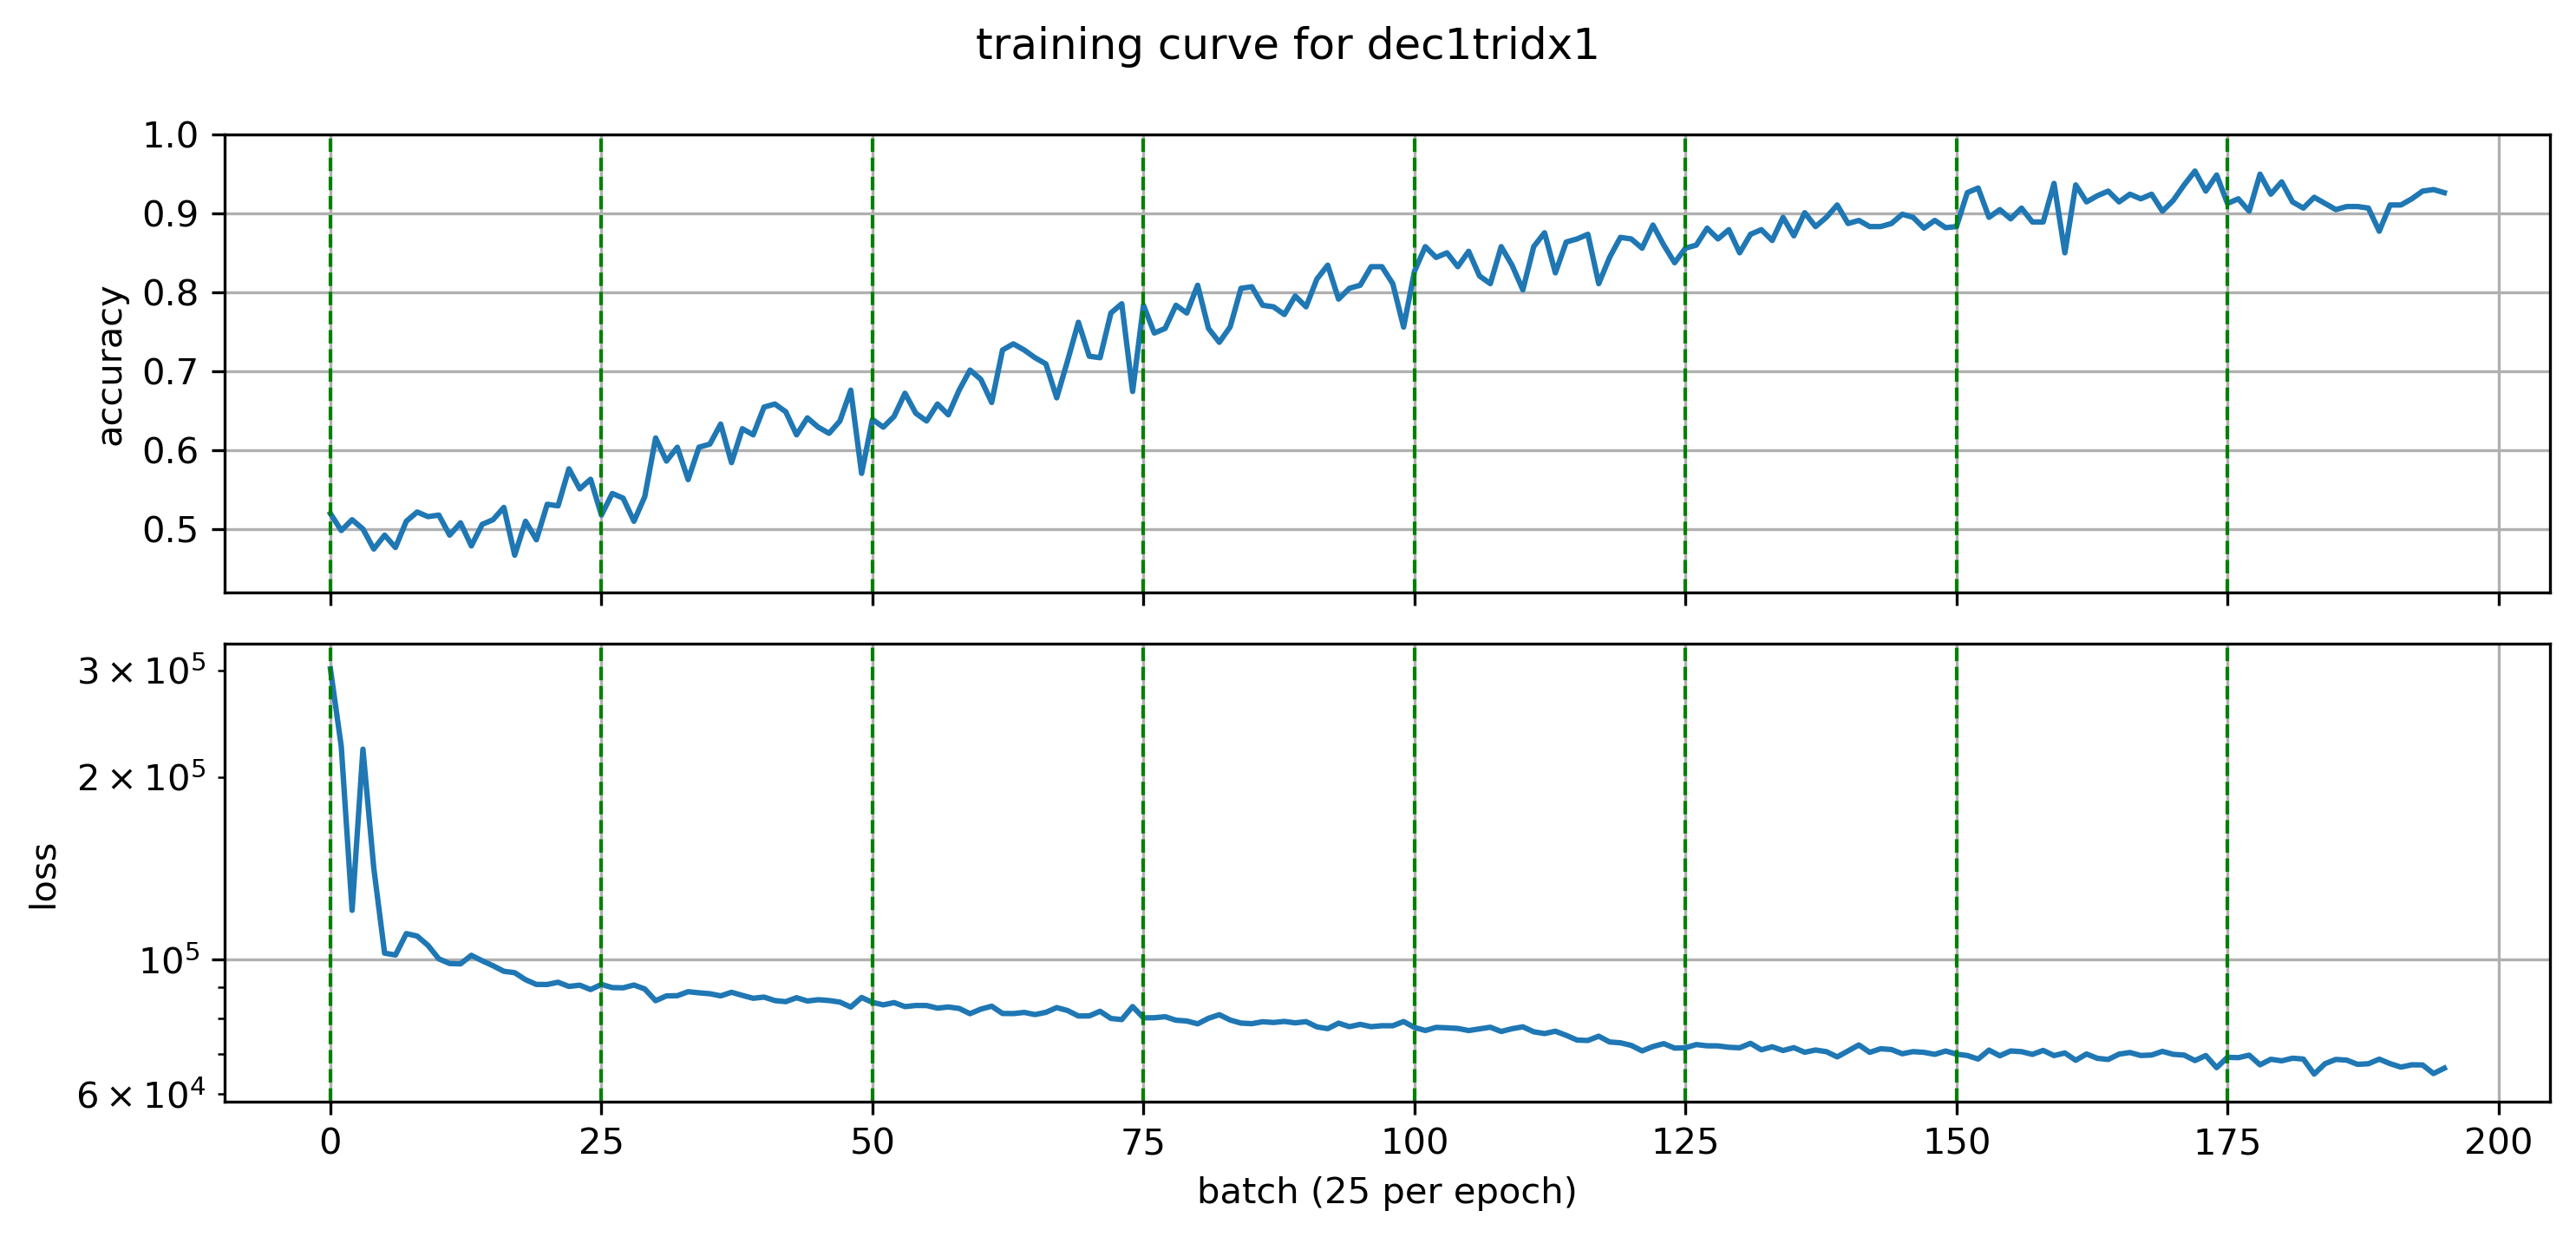

In [5]:
folder = '../models/dec1tridx1'
n_batches = 25
acc = np.load(f'{folder}/acc.npy')
loss = np.load(f'{folder}/loss.npy')
testacc = np.load(f'{folder}/test_acc.npy')
testloss = np.load(f'{folder}/test_loss.npy')

print('training:')
print_mean_acc_loss(acc, loss, n_batches)
print(f'\ntesting (last model):\nacc {testacc.mean():.2%} +/- {testacc.std():.2%} loss {testloss.mean():.1f} +/- {testloss.std():.1f}')
plot_acc_loss(acc, loss, title=f'training curve for {folder.split("/")[-1]}', n_batches=n_batches)

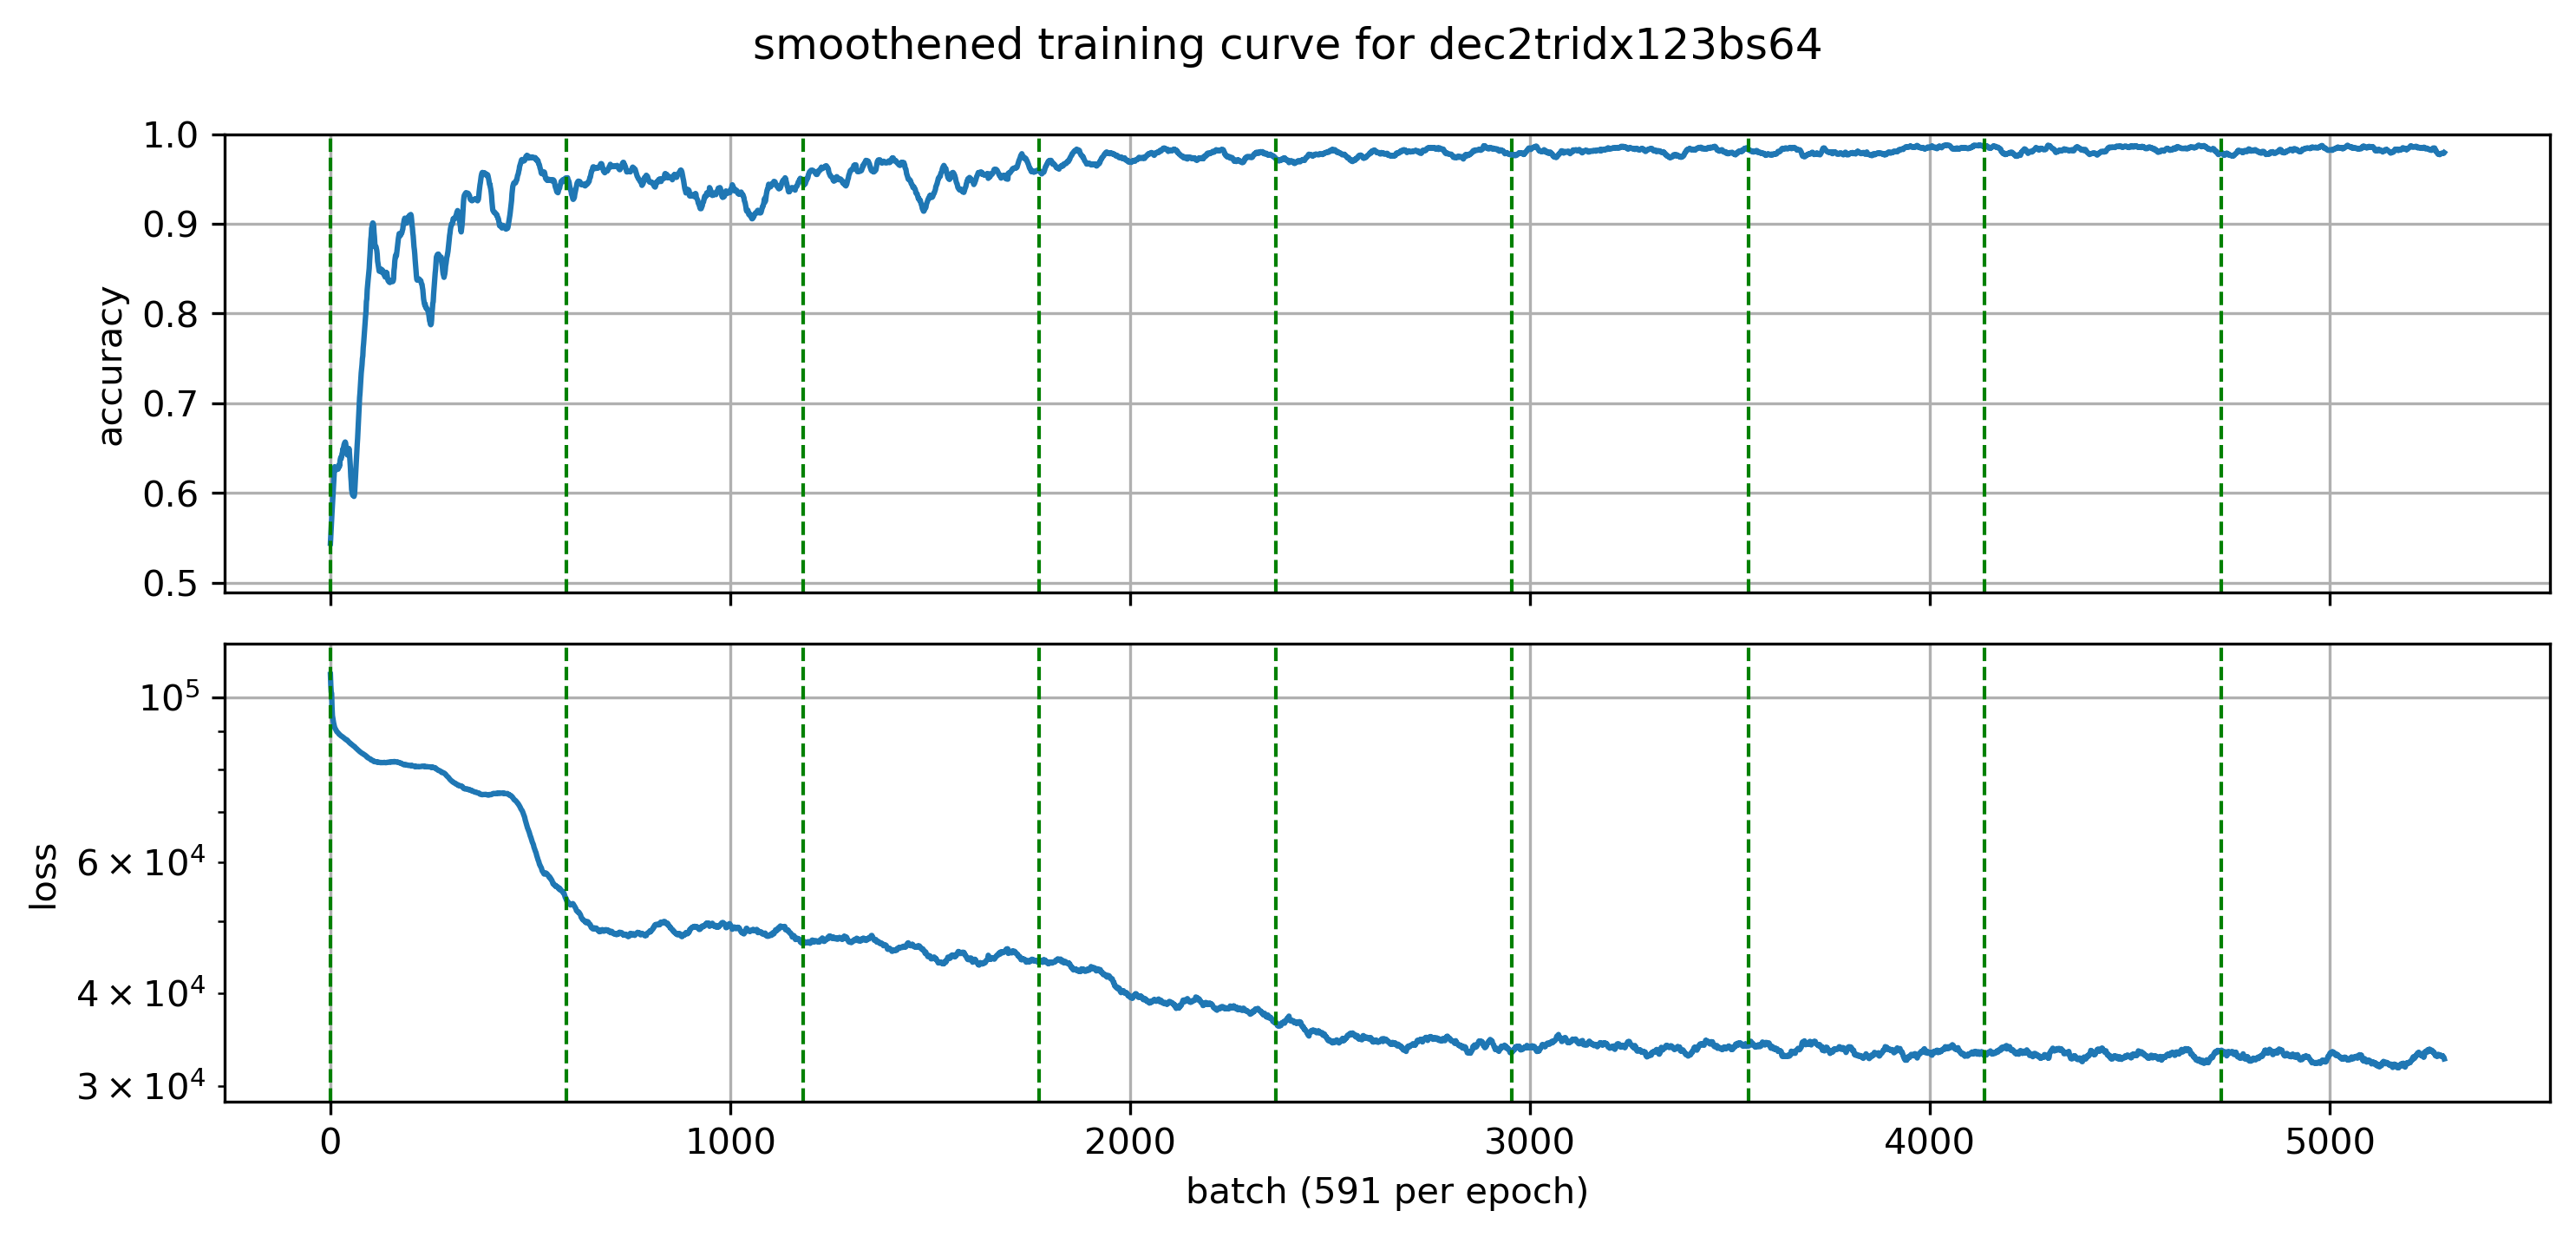

In [21]:
plot_acc_loss(acc, loss, title=f'smoothened training curve for {folder.split("/")[-1]}',
              n_batches=n_batches, conv=50)